In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

In [2]:
from dqn import DQN
from replay_buffer import ReplayBuffer
from her import HindsightExperienceReplay
from bit_flip_env import BitFlipEnv

In [3]:
n_bits = 50
env = BitFlipEnv(num_bits=n_bits)
state_dim = env.state_dim
n_actions = env.n_actions
state_dim, n_actions

(20, 20)

In [4]:
agent = DQN(state_dim * 2, n_actions)
buffer = ReplayBuffer(size=100_000)
her = HindsightExperienceReplay(env, agent, buffer, max_steps=n_bits)

In [5]:
her.play_and_learn()

(-40.0, False)

In [6]:
epochs = 50
epoch_iters = 800
success_history = []

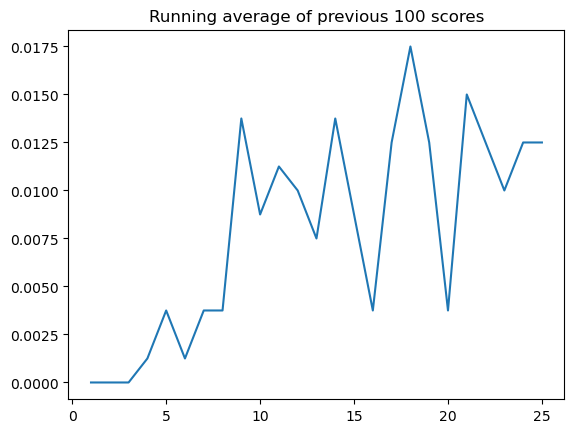

Epoch 25 success rate = 0.0125


 20%|█▉        | 157/800 [00:12<00:30, 20.97it/s]

In [7]:
from tqdm import tqdm
import numpy as np
from utils import plot_learning_curve

for epoch in range(epochs):
    score_history = []
    for iter in tqdm(range(epoch_iters)):
        score, success = her.play_and_learn()
        score_history.append(int(success))
    
    success_rate = np.mean(score_history)
    success_history.append(success_rate)
    plot_learning_curve(epoch + 1, success_history) 
    print(f"Epoch {epoch + 1} success rate = {success_rate}")